In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [4]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [5]:
month_mapper = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,
               'nov':11,'dec':12}
data['month'] = data['month'].map(month_mapper)

In [6]:
day_mapper = {'mon':1,'tue':2,'wed':3, 'thu':4,'fri':5,'sat':6, 'sun':7}
data['day'] = data['day'].map(day_mapper)

In [7]:
x = data.iloc[:,:-1]
x.shape

(517, 12)

In [8]:
y = data.iloc[:,-1]
y.shape

(517,)

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

In [10]:
names = x.columns
lasso_coef = lasso.fit(x,y).coef_

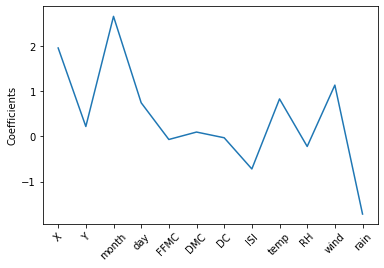

In [11]:
plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)),names,rotation=45)
plt.ylabel('Coefficients')
plt.show()